Import necessary packages.

In [19]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [25]:
### NOTE: it is important here to further declare these variables to be nonzero and positive (otherwise sympy cannot find solution for the FOCs)
Q, c, a, b, pi, s = symbols('Q c a b \pi s', nonzero=True, positive=True)

# monopoly with fixed-cost investment in quality: setup

## Firm and linear demand

Assume one monopolistic firm sells a product in a given market. We assume the firm has a constant marginal cost, $c$.

<span style="color:#CC3300"> In addition, we assume that 
* the firm can choose an invest in quality, denoted by $s$
* the cost of the investment is in the form of fixed cost, i.e., the investment does not affect the variable cost
* higher quality increases demand
</span>

The market demand for a product is linear, such that the inverse demand function takes the form of
\begin{align}
    p = a - b Q + \sqrt{s}
\end{align}

We assume $a > c$, so that consumer's willingness to pay exceeds the firm's cost to produce.

## Graph

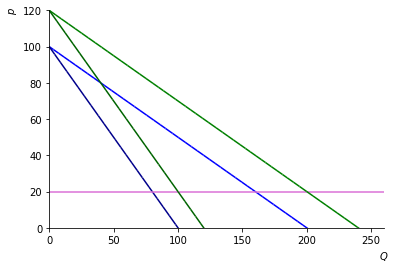

In [62]:
# Define inverse demand and calculate MR
DInverse = a - b*Q + s**(1/2)
MRcurve = diff(DInverse*Q, Q)

# Plotting inverse market demand 0
Dplot0 = plot(DInverse.subs([(a,100),(b,Rational(1,2)),(s,0)]), (Q,0,300), xlim=[0,260], ylim=[0,120], xlabel="$Q$", ylabel="$p$", show=False)
# Plotting MB curve 0
MRplot0 = plot(MRcurve.subs([(a,100),(b,Rational(1,2)),(s,0)]), (Q,0,300), xlim=[0,200], ylim=[0,120], xlabel="$Q$", ylabel="$p$", show=False)

# Plotting inverse market demand 1
Dplot1 = plot(DInverse.subs([(a,100),(b,Rational(1,2)),(s,400)]), (Q,0,300), xlim=[0,200], ylim=[0,120], xlabel="$Q$", ylabel="$p$", show=False)
# Plotting MB curve 1
MRplot1 = plot(MRcurve.subs([(a,100),(b,Rational(1,2)),(s,400)]), (Q,0,300), xlim=[0,200], ylim=[0,120], xlabel="$Q$", ylabel="$p$", show=False)


# Plotting MC curve
MCcurve = c
MCplot0 = plot(MCcurve.subs([(c,20)]), (Q,0,300), xlim=[0,200], ylim=[0,100], xlabel="$Q$", ylabel="$p$", show=False)


# combine plots into one plot
plot_combo = Dplot0
plot_combo.extend(MRplot0)
plot_combo.extend(MCplot0)

plot_combo.extend(Dplot1)
plot_combo.extend(MRplot1)

# assign colors for each line
plot_combo[0].line_color='blue'
plot_combo[1].line_color='darkblue'
plot_combo[2].line_color='orchid'

plot_combo[3].line_color='green'
plot_combo[4].line_color='darkgreen'

# show plot
plot_combo.show()

## The firm's profit-maximization problem

Under these modeling assumptions, each firm's profit is
\begin{align}
    \pi &= p\cdot Q - c \cdot Q - s\\
            &= (p-c)Q - s \tag{1}
\end{align}

Plugging in the inverse demand function, each firm's profit is
\begin{align}
    \pi(Q, s) & = \big(a - b Q + \sqrt{s} - c\big) Q  - s  \tag{2}
\end{align}

From here, we can try to find the FOC w.r.t. Q for the firm. But we will explore an alternative development before going this route.

## The firm's profit-maximization problem (re-write in terms of p)

Instead, from equation (1), we can plug in the demand function (not inverse demand) and rewrite $\pi$ in terms of $p$. Specifically, the firm's demand function is 
$$ Q = \frac{a}{b} + \frac{\sqrt{s}}{b} - \frac{p}{b} .$$
Plugging into (1), and we have
\begin{align}
    \pi(p, s) & = (p-c)\big(\frac{a}{b} + \frac{\sqrt{s}}{b} - \frac{p}{b} \big) - s  \tag{3}
\end{align}

# Analysis

## Monopolist chooses $Q$ and $s$ to maximize profit

If the firm chooses $Q$ and $s$ to maximize its profit, the firm maximizes (2), i.e.,
\begin{align}
    \max_{Q, s}\pi(Q, s) & = \big(a - bQ + \sqrt{s} - c\big) Q - s
\end{align}
which implies the FOC's
\begin{align}
    \frac{\partial \pi}{\partial Q} &= \big(a - bQ + \sqrt{s} - c\big) - bQ = 0 \\
    \frac{\partial \pi}{\partial s} &= \frac{Q}{2\sqrt{s}} - 1 = 0 
\end{align}
The 2nd FOC implies that
$$\sqrt{s} = \frac{Q}{2}$$
which we plug into the first FOC
\begin{align}
    && \big(a - bQ + \sqrt{s} - c\big) - bQ &= 0 \\
    \Rightarrow&& \big(a - bQ + \frac{Q}{2} - c\big) - bQ &= 0 \\
    \Rightarrow&& (2b - \frac{1}{2})Q &= a-c \\
    \Rightarrow&& Q^* &= \frac{2(a-c)}{4b-1} \\
\end{align}

Plugging back into $\sqrt{s} = \frac{Q}{2}$, and we have
\begin{align}
    s^* = \Big(\frac{Q^*}{2}\Big)^2 = \Big( \frac{a-c}{4b-1} \Big)^2
\end{align}

Plugging $Q^*$ and $s^*$ back into the inverse demand, and the monopolist would price at
\begin{align}
    p^* &= a - bQ^* + \sqrt{s^*} \\
        &= a - bQ^* + \frac{Q^*}{2} \\
        &= a + (\frac{1}{2} - b) Q^* \\
        &= a + (\frac{1}{2} - b)(\frac{2(a-c)}{4b-1})
\end{align}

### Verify analysis using Sympy

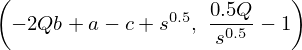

In [63]:
pi = DInverse*Q - c*Q - s
(pi.diff(Q), pi.diff(s))

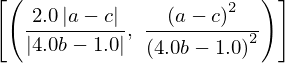

In [64]:
foc_sol = solve( ( diff(pi,Q), diff(pi,s) ), Q,s )
foc_sol

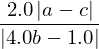

In [65]:
foc_sol[0][0]

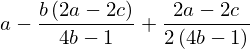

In [68]:
(a-b*Q+Q/2).subs([(Q, 2*(a-c)/(4*b-1))])

# Challenge

**Q1**: solve the monopolist's problem, but let the firm maximize profit by choosing $p$ and $s$. 

Compare your solution to the previous solution, do you find the same profit-maximizing price, quantity and quality choices?